# Preprocessing the Data for a Neural Network


In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import pandas as pd 

# Import and read the charity_data.csv.
rawDF = pd.read_csv("Dataset for Use.csv")
rawDF.head()

C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (24,26,29,31,34,41,43,45,48,49,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,brand,spend,campaign_id,account_id,campaign_name,status,mapped_storeid,end_advertiser,business_manager_manager_id,end_advertiser_name,...,Support Regions,maturity,open_date,market,tier,ownership_group,soft_open_status,campaign_status,manager_customer_id,serving_status
0,B1,536.29,1.700630e+09,5.144417e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENABLED,2.076624e+09,SERVING
1,B1,253.35,1.715917e+09,5.144417e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENABLED,2.076624e+09,SERVING
2,B1,125.22,1.441660e+10,5.144417e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PAUSED,2.076624e+09,SERVING
3,B1,289.04,1.700630e+09,5.144417e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENABLED,2.076624e+09,SERVING
4,B1,322.95,1.715917e+09,5.144417e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENABLED,2.076624e+09,SERVING


In [2]:
rawDF.info()
# columns to drop from index match: 
# 3,4,5,7,8,9,10,12,13,19,20,21,22,23,24,25,26,27,28,32,34,37,38,39,41,42,43,44,45,46,47,48,49,50,51

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203965 entries, 0 to 203964
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   brand                        203965 non-null  object 
 1   spend                        203965 non-null  float64
 2   campaign_id                  203965 non-null  float64
 3   account_id                   203965 non-null  float64
 4   campaign_name                0 non-null       float64
 5   status                       196414 non-null  object 
 6   mapped_storeid               202123 non-null  float64
 7   end_advertiser               195943 non-null  float64
 8   business_manager_manager_id  196414 non-null  float64
 9   end_advertiser_name          195943 non-null  object 
 10  business_manager_name        196414 non-null  object 
 11  platform                     203965 non-null  object 
 12  map_status                   203965 non-null  object 
 13 

In [3]:
# for loop to count understand what values are in "brand" column

# variable to hold the count
cnt = 0
  
# list to hold my B3 values
b3Vals = []
  
# loop for counting the unique
# values in height
for i in range(0, len(rawDF['brand'])):
    
    if rawDF['brand'][i] not in b3Vals: 
    
        b3Vals.append(rawDF['brand'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values name :",
      b3Vals)

No.of.unique values : 3
unique values name : ['B1', 'B2', 'B3']


In [4]:
# First objective; drop all "B3" rows within column "brand"

# observe column brand
rawDF.loc[rawDF['brand']== 'B3']
# output shows B3 starts (index) at 168645 and ends at 203964


,brand,spend,campaign_id,account_id,campaign_name,status,mapped_storeid,end_advertiser,business_manager_manager_id,end_advertiser_name,...,Support Regions,maturity,open_date,market,tier,ownership_group,soft_open_status,campaign_status,manager_customer_id,serving_status
168645,B3,211.23,9.579951e+09,9.610313e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENABLED,2.076624e+09,SUSPENDED
168646,B3,276.39,9.579951e+09,9.610313e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENABLED,2.076624e+09,SUSPENDED
168647,B3,4.00,1.440085e+10,9.610313e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PAUSED,2.076624e+09,SUSPENDED
168648,B3,411.61,1.010744e+10,9.610313e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENABLED,2.076624e+09,SUSPENDED
168649,B3,79.15,9.579951e+09,9.610313e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENABLED,2.076624e+09,SUSPENDED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203960,B3,77.28,2.380000e+16,1.670000e+15,NaN,PAUSED,11204.0,1.180000e+14,1.180000e+14,Agency 3,...,NaN,NaN,5/29/2021,NaN,3.0,NaN,NaN,NaN,NaN,NaN
203961,B3,11.49,2.380000e+16,9.940000e+14,NaN,PAUSED,9376.0,1.180000e+14,1.180000e+14,Agency 3,...,NaN,NaN,9/16/2020,NaN,5.0,NaN,NaN,NaN,NaN,NaN
203962,B3,18.03,2.380000e+16,9.940000e+14,NaN,PAUSED,9376.0,1.180000e+14,1.180000e+14,Agency 3,...,NaN,NaN,9/16/2020,NaN,5.0,NaN,NaN,NaN,NaN,NaN
203963,B3,17.27,2.380000e+16,9.940000e+14,NaN,PAUSED,9376.0,1.180000e+14,1.180000e+14,Agency 3,...,NaN,NaN,9/16/2020,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop all B3 values from brand column:
rawDF['brand'] = rawDF['brand'].drop(labels=range(168645, 203965), axis=0)

In [6]:
# check if any B3 values remain
rawDF.loc[rawDF['brand']== 'B3']

,brand,spend,campaign_id,account_id,campaign_name,status,mapped_storeid,end_advertiser,business_manager_manager_id,end_advertiser_name,...,Support Regions,maturity,open_date,market,tier,ownership_group,soft_open_status,campaign_status,manager_customer_id,serving_status


In [9]:
# filtered out B3, now.. 
# DROP predetermined Nan or confidential columns to remove by index: 
cleanDf_MLStandIn = rawDF.drop(rawDF.columns[[3,4,5,7,8,9,10,12,13,19,20,21,22,23,24,25,26,27,28,32,34,37,38,39,41,42,43,44,45,46,47,48,49,50,51]], axis=1)
cleanDf_MLStandIn

,brand,spend,campaign_id,mapped_storeid,platform,date_start,impressions,leads,website_leads,link_clicks,name,chainid,country,agency,type,store_id,state
0,B1,536.29,1.700630e+09,NaN,Google Ads,12/13/2021,4423,55.0,NaN,268,NaN,NaN,NaN,Agency 1,National,NaN,NaN
1,B1,253.35,1.715917e+09,NaN,Google Ads,3/20/2021,868,19.0,NaN,145,NaN,NaN,NaN,Agency 1,National,NaN,NaN
2,B1,125.22,1.441660e+10,NaN,Google Ads,8/28/2021,596,15.0,NaN,47,NaN,NaN,NaN,Agency 1,National,NaN,NaN
3,B1,289.04,1.700630e+09,NaN,Google Ads,7/13/2021,1827,27.0,NaN,172,NaN,NaN,NaN,Agency 1,National,NaN,NaN
4,B1,322.95,1.715917e+09,NaN,Google Ads,4/10/2021,1074,19.0,NaN,170,NaN,NaN,NaN,Agency 1,National,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203960,NaN,77.28,2.380000e+16,11204.0,Facebook Ads,6/29/2021,1623,0.0,0.0,16,Local Facebook_Agency 3_CAP,642.0,US,Agency 3,Local,11204.0,CA
203961,NaN,11.49,2.380000e+16,9376.0,Facebook Ads,6/28/2021,404,0.0,0.0,5,Local Facebook_Agency 3_CAP,642.0,US,Agency 3,Local,9376.0,CA
203962,NaN,18.03,2.380000e+16,9376.0,Facebook Ads,6/27/2021,576,0.0,0.0,5,Local Facebook_Agency 3_CAP,642.0,US,Agency 3,Local,9376.0,CA
203963,NaN,17.27,2.380000e+16,9376.0,Facebook Ads,6/26/2021,555,0.0,0.0,7,Local Facebook_Agency 3_CAP,642.0,US,Agency 3,Local,9376.0,CA


In [10]:
# export clean CSV, for reference beore binning process
cleanDf_MLStandIn.to_csv('cleanDf_MLStandIn.csv')

# Rough/Quick Preprocessing Complete

# Binning

In [12]:
# Determine the number of unique values in each column.
cleanDf_MLStandIn.nunique()

brand                 2
spend             11108
campaign_id          83
mapped_storeid      479
platform              4
date_start          365
impressions        6336
leads                74
website_leads        95
link_clicks         392
name                 12
chainid               4
country               2
agency               12
type                  2
store_id            478
state                46
dtype: int64

In [13]:
# Look at leads value counts for binning
leadsCnts = cleanDf_MLStandIn['leads'].value_counts()
leadsCnts

0.0     91353
1.0     45251
2.0     26951
3.0     15415
4.0      8728
        ...  
95.0        1
57.0        1
56.0        1
79.0        1
48.0        1
Name: leads, Length: 74, dtype: int64

<AxesSubplot:ylabel='Density'>

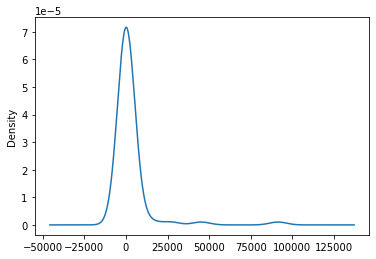

In [14]:
# Visualize the value counts of leadsCnts
leadsCnts.plot.density()

In [15]:
# Look at leads value counts for binning
impresCnts = cleanDf_MLStandIn['impressions'].value_counts()
impresCnts

0        18033
547        118
719        113
569        112
726        112
         ...  
7243         1
5124         1
6257         1
19750        1
4227         1
Name: impressions, Length: 6336, dtype: int64

<AxesSubplot:ylabel='Density'>

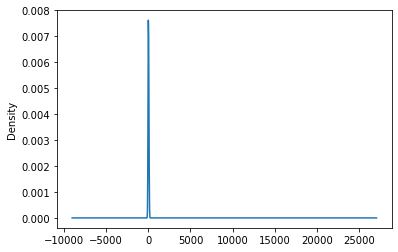

In [16]:
# Visualize the value counts of impresCnts
impresCnts.plot.density()

# Split into train and test features

In [ ]:
# 

# Compile, Train, Evaluate our Model